# RFM Clustering

## by Farzad Minooei

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Read Data from File

In [2]:
data = pd.read_csv('CS_08.csv')

## Data Inspection

In [3]:
data.shape

(40537, 5)

In [4]:
data.head()

,order_id,created_ts,shamsy_date,customer_id,total_purchase
0,5c92a3d9a7b11b0001e4ec46,3/21/2019 0:04,1398-Farvardin-1,5bf1092b24aa9a000135ac7c,240000.0
1,5c92af8024aa9a00015b536d,3/21/2019 0:54,1398-Farvardin-1,58d2fe9b46e0fb0001e432c0,620000.0
2,5c930b0ea7b11b0001e4f07e,3/21/2019 7:24,1398-Farvardin-1,5c85f140a7b11b0001e65ec1,320000.0
3,5c93157324aa9a00015b5750,3/21/2019 8:09,1398-Farvardin-1,59c52fe152faff00014e4932,220000.0
4,5c93250024aa9a00015b5884,3/21/2019 9:15,1398-Farvardin-1,58eba26fd601800001b98a34,360000.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40537 entries, 0 to 40536
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        40537 non-null  object 
 1   created_ts      40537 non-null  object 
 2   shamsy_date     40537 non-null  object 
 3   customer_id     40537 non-null  object 
 4   total_purchase  40537 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.5+ MB


In [6]:
data.describe()

,total_purchase
count,4.053700e+04
mean,3.488023e+05
std,1.414450e+05
min,8.000000e+04
25%,2.600000e+05
50%,3.200000e+05
75%,4.200000e+05
max,3.200000e+06


Text(0, 0.5, 'Frequency')

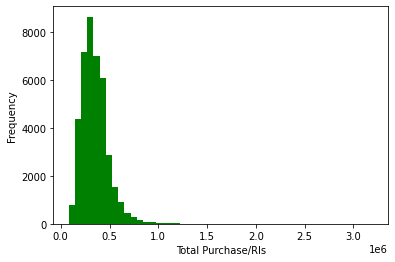

In [7]:
#Histogram of total purchase
plt.hist(data['total_purchase'], color = 'green', 
         bins = np.linspace(data['total_purchase'].min(), data['total_purchase'].max(), 50))
plt.xlabel('Total Purchase/Rls')
plt.ylabel('Frequency')

In [8]:
#daily demand
data['created_ts'] = pd.to_datetime(data['created_ts'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40537 entries, 0 to 40536
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        40537 non-null  object        
 1   created_ts      40537 non-null  datetime64[ns]
 2   shamsy_date     40537 non-null  object        
 3   customer_id     40537 non-null  object        
 4   total_purchase  40537 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.5+ MB


In [10]:
data['date'] = data['created_ts'].dt.date

In [11]:
data

,order_id,created_ts,shamsy_date,customer_id,total_purchase,date
0,5c92a3d9a7b11b0001e4ec46,2019-03-21 00:04:00,1398-Farvardin-1,5bf1092b24aa9a000135ac7c,240000.0,2019-03-21
1,5c92af8024aa9a00015b536d,2019-03-21 00:54:00,1398-Farvardin-1,58d2fe9b46e0fb0001e432c0,620000.0,2019-03-21
2,5c930b0ea7b11b0001e4f07e,2019-03-21 07:24:00,1398-Farvardin-1,5c85f140a7b11b0001e65ec1,320000.0,2019-03-21
3,5c93157324aa9a00015b5750,2019-03-21 08:09:00,1398-Farvardin-1,59c52fe152faff00014e4932,220000.0,2019-03-21
4,5c93250024aa9a00015b5884,2019-03-21 09:15:00,1398-Farvardin-1,58eba26fd601800001b98a34,360000.0,2019-03-21
...,...,...,...,...,...,...
40532,5d35fd03b2cf38d2d17b11c9,2019-07-22 22:44:00,1398-Tir-31,58d2972b46e0fb0001e42133,280000.0,2019-07-22
40533,5d35fe44ec2c893461deb4e0,2019-07-22 22:49:00,1398-Tir-31,597009a6c9e77c00018c27d9,300000.0,2019-07-22
40534,5d35ff28b2cf38d2d17b1228,2019-07-22 22:53:00,1398-Tir-31,59222bce52faff00016c59cc,180000.0,2019-07-22
40535,5d360499b2cf38d2d17b12f6,2019-07-22 23:16:00,1398-Tir-31,5d19f78ab2cf38e5e4deddd6,180000.0,2019-07-22


In [12]:
daily_demand = data.groupby(by = ['date'])['order_id'].count()

(array([17970., 17987., 18001., 18017., 18031., 18048., 18062., 18078.,
        18092.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

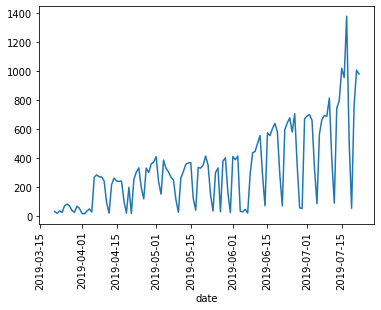

In [13]:
daily_demand.plot()
plt.xticks(rotation = 90) 

## Create RFM Dataset

### Frequency

In [14]:
customer_f = pd.DataFrame({'freq': data.groupby(by = ['customer_id'])['order_id'].count()})
customer_f

,freq
customer_id,
5.94687E+23,2
5.94772E+23,1
5.94773E+23,5
5.95E+25,1
58a4b0e452faff000179dbd0,7
...,...
5d3584f8b2cf38d2d17aafba,1
5d359600b2cf38d2d17ac0e7,1
5d35a06bb2cf38d2d17acbc3,1


Text(0, 0.5, 'Frequency')

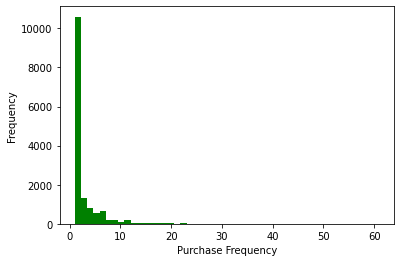

In [15]:
#Histogram of purchase frequency
plt.hist(customer_f['freq'], color = 'green', 
         bins = np.linspace(customer_f['freq'].min(), customer_f['freq'].max(), 50))
plt.xlabel('Purchase Frequency')
plt.ylabel('Frequency')

In [16]:
customer_f.describe()

,freq
count,14964.000000
mean,2.708968
std,3.425412
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,61.000000


### Recency

In [17]:
data.tail()

,order_id,created_ts,shamsy_date,customer_id,total_purchase,date
40532,5d35fd03b2cf38d2d17b11c9,2019-07-22 22:44:00,1398-Tir-31,58d2972b46e0fb0001e42133,280000.0,2019-07-22
40533,5d35fe44ec2c893461deb4e0,2019-07-22 22:49:00,1398-Tir-31,597009a6c9e77c00018c27d9,300000.0,2019-07-22
40534,5d35ff28b2cf38d2d17b1228,2019-07-22 22:53:00,1398-Tir-31,59222bce52faff00016c59cc,180000.0,2019-07-22
40535,5d360499b2cf38d2d17b12f6,2019-07-22 23:16:00,1398-Tir-31,5d19f78ab2cf38e5e4deddd6,180000.0,2019-07-22
40536,5d360b2eec2c893461deb667,2019-07-22 23:44:00,1398-Tir-31,5c46e8fe24aa9a00019af009,180000.0,2019-07-22


In [18]:
r_date = pd.to_datetime('2019-07-23').date() - data['date']

In [19]:
r_date[0]

Timedelta('124 days 00:00:00')

In [20]:
r_date.dt.days

0        124
1        124
2        124
3        124
4        124
        ... 
40532      1
40533      1
40534      1
40535      1
40536      1
Name: date, Length: 40537, dtype: int64

In [21]:
data['r_date'] = r_date.dt.days
data

,order_id,created_ts,shamsy_date,customer_id,total_purchase,date,r_date
0,5c92a3d9a7b11b0001e4ec46,2019-03-21 00:04:00,1398-Farvardin-1,5bf1092b24aa9a000135ac7c,240000.0,2019-03-21,124
1,5c92af8024aa9a00015b536d,2019-03-21 00:54:00,1398-Farvardin-1,58d2fe9b46e0fb0001e432c0,620000.0,2019-03-21,124
2,5c930b0ea7b11b0001e4f07e,2019-03-21 07:24:00,1398-Farvardin-1,5c85f140a7b11b0001e65ec1,320000.0,2019-03-21,124
3,5c93157324aa9a00015b5750,2019-03-21 08:09:00,1398-Farvardin-1,59c52fe152faff00014e4932,220000.0,2019-03-21,124
4,5c93250024aa9a00015b5884,2019-03-21 09:15:00,1398-Farvardin-1,58eba26fd601800001b98a34,360000.0,2019-03-21,124
...,...,...,...,...,...,...,...
40532,5d35fd03b2cf38d2d17b11c9,2019-07-22 22:44:00,1398-Tir-31,58d2972b46e0fb0001e42133,280000.0,2019-07-22,1
40533,5d35fe44ec2c893461deb4e0,2019-07-22 22:49:00,1398-Tir-31,597009a6c9e77c00018c27d9,300000.0,2019-07-22,1
40534,5d35ff28b2cf38d2d17b1228,2019-07-22 22:53:00,1398-Tir-31,59222bce52faff00016c59cc,180000.0,2019-07-22,1
40535,5d360499b2cf38d2d17b12f6,2019-07-22 23:16:00,1398-Tir-31,5d19f78ab2cf38e5e4deddd6,180000.0,2019-07-22,1


In [22]:
customer_r = pd.DataFrame({'recency': data.groupby(by = ['customer_id'])['r_date'].min()})
customer_r

,recency
customer_id,
5.94687E+23,9
5.94772E+23,64
5.94773E+23,9
5.95E+25,5
58a4b0e452faff000179dbd0,7
...,...
5d3584f8b2cf38d2d17aafba,1
5d359600b2cf38d2d17ac0e7,1
5d35a06bb2cf38d2d17acbc3,1


Text(0, 0.5, 'Frequency')

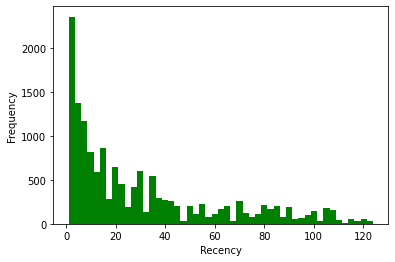

In [23]:
#Histogram of recency
plt.hist(customer_r['recency'], color = 'green', 
         bins = np.linspace(customer_r['recency'].min(), customer_r['recency'].max(), 50))
plt.xlabel('Recency')
plt.ylabel('Frequency')

In [24]:
customer_r.describe()

,recency
count,14964.000000
mean,30.497995
std,30.833106
min,1.000000
25%,7.000000
50%,19.000000
75%,43.000000
max,124.000000


### Monetary 

In [25]:
customer_m = pd.DataFrame({'monetary': data.groupby(by = ['customer_id'])['total_purchase'].sum()})
customer_m

,monetary
customer_id,
5.94687E+23,680000.0
5.94772E+23,600000.0
5.94773E+23,1700000.0
5.95E+25,320000.0
58a4b0e452faff000179dbd0,1480000.0
...,...
5d3584f8b2cf38d2d17aafba,200000.0
5d359600b2cf38d2d17ac0e7,520000.0
5d35a06bb2cf38d2d17acbc3,440000.0


Text(0, 0.5, 'Frequency')

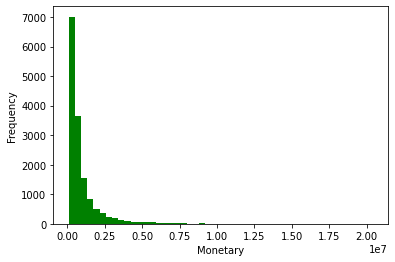

In [26]:
#Histogram of recency
plt.hist(customer_m['monetary'], color = 'green', 
         bins = np.linspace(customer_m['monetary'].min(), customer_m['monetary'].max(), 50))
plt.xlabel('Monetary')
plt.ylabel('Frequency')

In [27]:
customer_m.describe()

,monetary
count,1.496400e+04
mean,9.448944e+05
std,1.217563e+06
min,8.000000e+04
25%,3.200000e+05
50%,5.200000e+05
75%,1.040000e+06
max,2.042000e+07


### RFM Dataframe for Customers

In [28]:
df = customer_f.merge(customer_r, left_index = True, right_index = True)
df

,freq,recency
customer_id,,
5.94687E+23,2,9
5.94772E+23,1,64
5.94773E+23,5,9
5.95E+25,1,5
58a4b0e452faff000179dbd0,7,7
...,...,...
5d3584f8b2cf38d2d17aafba,1,1
5d359600b2cf38d2d17ac0e7,1,1
5d35a06bb2cf38d2d17acbc3,1,1


In [29]:
rfm_customer = df.merge(customer_m, left_index = True, right_index = True)

In [30]:
rfm_customer

,freq,recency,monetary
customer_id,,,
5.94687E+23,2,9,680000.0
5.94772E+23,1,64,600000.0
5.94773E+23,5,9,1700000.0
5.95E+25,1,5,320000.0
58a4b0e452faff000179dbd0,7,7,1480000.0
...,...,...,...
5d3584f8b2cf38d2d17aafba,1,1,200000.0
5d359600b2cf38d2d17ac0e7,1,1,520000.0
5d35a06bb2cf38d2d17acbc3,1,1,440000.0


## Clustering

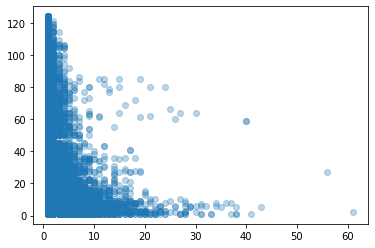

In [31]:
plt.scatter(x = rfm_customer['freq'], y = rfm_customer['recency'], alpha = 0.3)

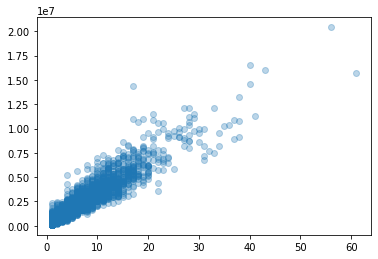

In [32]:
plt.scatter(x = rfm_customer['freq'], y = rfm_customer['monetary'], alpha = 0.3)

In [33]:
rfm_customer[['freq', 'monetary']].corr(method = 'pearson')

,freq,monetary
freq,1.000000,0.947786
monetary,0.947786,1.000000


In [34]:
rfm_customer_2 = rfm_customer.loc[:, ['freq', 'recency']]

In [35]:
rfm_customer_2

,freq,recency
customer_id,,
5.94687E+23,2,9
5.94772E+23,1,64
5.94773E+23,5,9
5.95E+25,1,5
58a4b0e452faff000179dbd0,7,7
...,...,...
5d3584f8b2cf38d2d17aafba,1,1
5d359600b2cf38d2d17ac0e7,1,1
5d35a06bb2cf38d2d17acbc3,1,1


In [40]:
#Scale features
from sklearn.preprocessing import StandardScaler

In [41]:
scaled_data = StandardScaler().fit_transform(rfm_customer_2)
scaled_data

array([[-0.20698004, -0.69726072],
       [-0.49892549,  1.08659584],
       [ 0.66885632, -0.69726072],
       ...,
       [-0.49892549, -0.95673077],
       [-0.49892549, -0.95673077],
       [-0.49892549, -0.95673077]])

In [42]:
scaled_data = pd.DataFrame(scaled_data, 
                           columns = rfm_customer_2.columns, 
                           index = rfm_customer_2.index)

scaled_data

,freq,recency
customer_id,,
5.94687E+23,-0.206980,-0.697261
5.94772E+23,-0.498925,1.086596
5.94773E+23,0.668856,-0.697261
5.95E+25,-0.498925,-0.826996
58a4b0e452faff000179dbd0,1.252747,-0.762128
...,...,...
5d3584f8b2cf38d2d17aafba,-0.498925,-0.956731
5d359600b2cf38d2d17ac0e7,-0.498925,-0.956731
5d35a06bb2cf38d2d17acbc3,-0.498925,-0.956731


### K-means Clustering

In [43]:
#First try
from sklearn.cluster import KMeans
seg_km1 = KMeans(n_clusters = 5, init = 'random', random_state = 123, n_init = 1).fit(scaled_data)

In [44]:
rfm_customer['seg_km1'] = seg_km1.predict(scaled_data)
rfm_customer

,freq,recency,monetary,seg_km1
customer_id,,,,
5.94687E+23,2,9,680000.0,3
5.94772E+23,1,64,600000.0,0
5.94773E+23,5,9,1700000.0,1
5.95E+25,1,5,320000.0,3
58a4b0e452faff000179dbd0,7,7,1480000.0,1
...,...,...,...,...
5d3584f8b2cf38d2d17aafba,1,1,200000.0,3
5d359600b2cf38d2d17ac0e7,1,1,520000.0,3
5d35a06bb2cf38d2d17acbc3,1,1,440000.0,3


In [45]:
rfm_customer['seg_km1'].isna().sum()

0

In [46]:
#Results
rfm_customer.groupby(['seg_km1'])[['freq', 'recency', 'monetary']].mean()

,freq,recency,monetary
seg_km1,,,
0,1.294577,88.131877,4.399220e+05
1,5.889978,10.173274,2.049149e+06
2,16.001795,9.861759,5.464201e+06
3,1.602254,9.825655,5.728174e+05
4,1.518934,40.075736,5.362132e+05


Text(0, 0.5, 'recency')

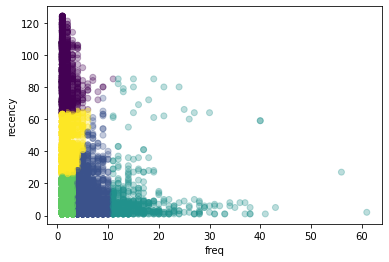

In [47]:
#Scatter Plot - First Try
plt.scatter(x = rfm_customer['freq'], y = rfm_customer['recency'], 
            c = rfm_customer['seg_km1'], alpha = 0.3)
plt.xlabel('freq')
plt.ylabel('recency')

In [48]:
#Second try
from sklearn.cluster import KMeans
seg_km2 = KMeans(n_clusters = 5, init = 'random', random_state = 1000, n_init = 1).fit(scaled_data)

In [49]:
rfm_customer['seg_km2'] = seg_km2.predict(scaled_data)
rfm_customer

,freq,recency,monetary,seg_km1,seg_km2
customer_id,,,,,
5.94687E+23,2,9,680000.0,3,2
5.94772E+23,1,64,600000.0,0,0
5.94773E+23,5,9,1700000.0,1,2
5.95E+25,1,5,320000.0,3,2
58a4b0e452faff000179dbd0,7,7,1480000.0,1,3
...,...,...,...,...,...
5d3584f8b2cf38d2d17aafba,1,1,200000.0,3,2
5d359600b2cf38d2d17ac0e7,1,1,520000.0,3,2
5d35a06bb2cf38d2d17acbc3,1,1,440000.0,3,2


In [50]:
#Results
rfm_customer.groupby(['seg_km2'])[['freq', 'recency', 'monetary']].mean()

,freq,recency,monetary
seg_km2,,,
0,1.631972,63.046003,5.556757e+05
1,1.503109,31.003514,5.394539e+05
2,2.352606,7.952176,8.298693e+05
3,11.604085,9.745483,3.990825e+06
4,1.181714,95.962286,4.003886e+05


Text(0, 0.5, 'recency')

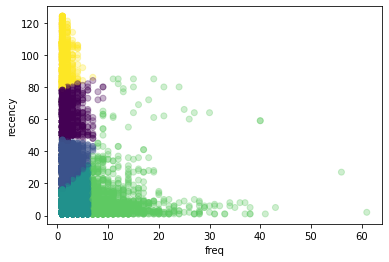

In [51]:
#Scatter Plot - Second Try
plt.scatter(x = rfm_customer['freq'], y = rfm_customer['recency'], 
            c = rfm_customer['seg_km2'], alpha = 0.3)
plt.xlabel('freq')
plt.ylabel('recency')

### K-means ++ 

In [52]:
#Kmeans ++
#https://en.wikipedia.org/wiki/K-means%2B%2B

In [53]:
#n_init: sets the number of initializations to perform. 
#The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

In [54]:
#First Try
from sklearn.cluster import KMeans
seg_km3 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 1000, n_init = 15).fit(scaled_data)

In [55]:
rfm_customer['seg_km3'] = seg_km3.predict(scaled_data)
rfm_customer

,freq,recency,monetary,seg_km1,seg_km2,seg_km3
customer_id,,,,,,
5.94687E+23,2,9,680000.0,3,2,1
5.94772E+23,1,64,600000.0,0,0,4
5.94773E+23,5,9,1700000.0,1,2,3
5.95E+25,1,5,320000.0,3,2,1
58a4b0e452faff000179dbd0,7,7,1480000.0,1,3,3
...,...,...,...,...,...,...
5d3584f8b2cf38d2d17aafba,1,1,200000.0,3,2,1
5d359600b2cf38d2d17ac0e7,1,1,520000.0,3,2,1
5d35a06bb2cf38d2d17acbc3,1,1,440000.0,3,2,1


In [56]:
#Results
rfm_customer.groupby(['seg_km3'])[['freq', 'recency', 'monetary']].mean()

,freq,recency,monetary
seg_km3,,,
0,1.291134,88.687300,4.391454e+05
1,1.833882,9.707273,6.540527e+05
2,18.298387,10.056452,6.181882e+06
3,7.206186,10.252005,2.505670e+06
4,1.546721,40.380874,5.450383e+05


Text(0, 0.5, 'recency')

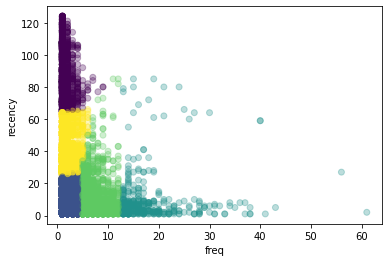

In [57]:
#Scatter Plot - First Try
plt.scatter(x = rfm_customer['freq'], y = rfm_customer['recency'], 
            c = rfm_customer['seg_km3'], alpha = 0.3)
plt.xlabel('freq')
plt.ylabel('recency')

In [58]:
#Second Try
from sklearn.cluster import KMeans
seg_km4 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 1234, n_init = 15).fit(scaled_data)

In [59]:
rfm_customer['seg_km4'] = seg_km4.predict(scaled_data)
rfm_customer

,freq,recency,monetary,seg_km1,seg_km2,seg_km3,seg_km4
customer_id,,,,,,,
5.94687E+23,2,9,680000.0,3,2,1,4
5.94772E+23,1,64,600000.0,0,0,4,3
5.94773E+23,5,9,1700000.0,1,2,3,1
5.95E+25,1,5,320000.0,3,2,1,4
58a4b0e452faff000179dbd0,7,7,1480000.0,1,3,3,1
...,...,...,...,...,...,...,...
5d3584f8b2cf38d2d17aafba,1,1,200000.0,3,2,1,4
5d359600b2cf38d2d17ac0e7,1,1,520000.0,3,2,1,4
5d35a06bb2cf38d2d17acbc3,1,1,440000.0,3,2,1,4


In [60]:
#Results
rfm_customer.groupby(['seg_km4'])[['freq', 'recency', 'monetary']].mean()

,freq,recency,monetary
seg_km4,,,
0,1.556510,39.990028,5.488255e+05
1,7.206186,10.252005,2.505670e+06
2,18.298387,10.056452,6.181882e+06
3,1.286328,88.148047,4.372031e+05
4,1.832834,9.692630,6.537358e+05


Text(0, 0.5, 'recency')

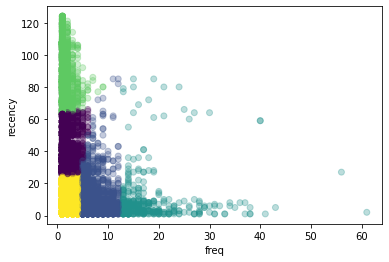

In [61]:
#Scatter Plot - Second Try
plt.scatter(x = rfm_customer['freq'], y = rfm_customer['recency'], 
            c = rfm_customer['seg_km4'], alpha = 0.3)
plt.xlabel('freq')
plt.ylabel('recency')

## Optimal Number of Clusters

### The Elbow Method 

In [62]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 1234, n_init = 10)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

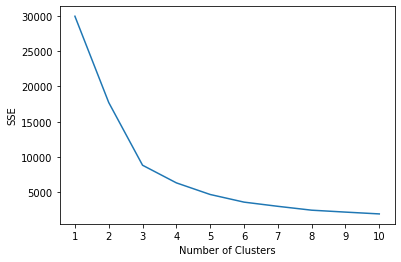

In [63]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

### Silhouette Coefficient

In [64]:
from sklearn.metrics import silhouette_score

In [65]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 1234, n_init = 10)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_coefficients.append(score)

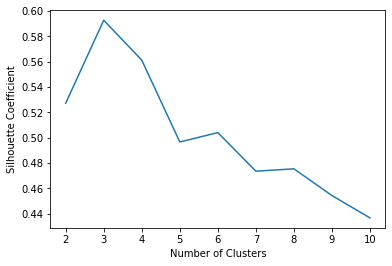

In [66]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# End of the Code